=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

                                  ES335- Machine Learning (HAR-INSIGHT)

Creating the dataset for the project. The dataset is created by reading the data from
the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
to be used for all the modeling purposes.

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

In [22]:
# Library imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [23]:
# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

In [24]:
combined_dir = os.path.join("Combined")

In [25]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

In [26]:
X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

In [27]:
for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

In [28]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [29]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

In [30]:
X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

In [31]:
for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

In [32]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [33]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

In [34]:
# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

In [35]:
# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

In [36]:
print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


In [37]:
X_train

array([[[ 0.9736077 , -0.1844755 , -0.2821974 ],
        [ 0.9760866 , -0.1867793 , -0.2848794 ],
        [ 0.977865  , -0.191836  , -0.2891687 ],
        ...,
        [ 0.9779202 , -0.1834941 , -0.2829651 ],
        [ 0.9796224 , -0.1832831 , -0.279844  ],
        [ 0.9775468 , -0.1833646 , -0.2764387 ]],

       [[ 1.00564   , -0.1732591 , -0.2299191 ],
        [ 1.006267  , -0.1727248 , -0.2516695 ],
        [ 1.004331  , -0.1783138 , -0.2447012 ],
        ...,
        [ 0.9963187 , -0.165975  , -0.2166365 ],
        [ 0.998345  , -0.1662256 , -0.2176124 ],
        [ 1.00105   , -0.1642913 , -0.2210956 ]],

       [[ 0.784794  , -0.2597323 , -0.2317497 ],
        [ 0.8028195 , -0.2151319 , -0.2276441 ],
        [ 0.7250539 , -0.2064177 , -0.2095281 ],
        ...,
        [ 0.6540971 , -0.140727  , -0.2860766 ],
        [ 0.6268603 , -0.2748843 , -0.2455943 ],
        [ 0.6052588 , -0.3292142 , -0.1952567 ]],

       ...,

       [[ 1.013856  , -0.08463204, -0.1833906 ],
        [ 1

---

**Task 1: Visual Analysis of Activity Waveforms**

Plotting the waveform data for each activity class to identify differences and similarities between the activities. This visual analysis aims to provide insights into whether the model can effectively classify activities based on the observed data patterns.

In [38]:
df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["accx", "accy", "accz", "Label"])
df

,accx,accy,accz,Label
0,0.973608,-0.184475,-0.282197,5.0
1,0.976087,-0.186779,-0.284879,5.0
2,0.977865,-0.191836,-0.289169,5.0
3,0.979638,-0.191792,-0.291794,5.0
4,0.982244,-0.189156,-0.288260,5.0
...,...,...,...,...
53995,0.730058,-0.197915,-0.066743,2.0
53996,0.696212,-0.149662,-0.059822,2.0
53997,0.731536,-0.162198,-0.049890,2.0
53998,0.762215,-0.176539,-0.038009,2.0


---

# LSTM

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [40]:
# Normalize the sensor data - To make it between 0 and 1 
scaler = StandardScaler()
df[['accx', 'accy', 'accz']] = scaler.fit_transform(df[['accx', 'accy', 'accz']])

In [79]:
# Segment the data into overlapping windows
def create_segments_and_labels(data, time_steps, step):
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segments.append(data.iloc[i:i + time_steps][['accx', 'accy', 'accz']].values)
        labels.append(data.iloc[i + time_steps - 1]['Label'])
    return np.array(segments), np.array(labels)

time_steps = 10
step = 5   # Overlap of 5
X, y = create_segments_and_labels(df, time, offset)

In [80]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test , X_val , y_test , y_val = train_test_split(X_test , y_test , test_size = 0.4 , random_state = 42)

num_classes = 6  
y_train = to_categorical(y_train-1, num_classes) 
y_val = to_categorical(y_val-1, num_classes)
y_test = to_categorical(y_test-1, num_classes)

In [103]:
# Define LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.5),
    LSTM(32, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, verbose=1)


Epoch 1/100


c:\Users\OmkarRPrabhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.1813 - loss: 1.7833 - val_accuracy: 0.3333 - val_loss: 1.7281
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3138 - loss: 1.7101 - val_accuracy: 0.3908 - val_loss: 1.6696
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3635 - loss: 1.6430 - val_accuracy: 0.3678 - val_loss: 1.6047
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3285 - loss: 1.5887 - val_accuracy: 0.3103 - val_loss: 1.5438
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3613 - loss: 1.5094 - val_accuracy: 0.2989 - val_loss: 1.4887
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3289 - loss: 1.4672 - val_accuracy: 0.2989 - val_loss: 1.4402
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3679 - loss: 1.4390 - val_accuracy: 0.3333 - val_loss: 1.4049
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3545 - loss: 1.3855 - val_accuracy: 0.4138 - val_loss: 1.3810
Epoc

In [106]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Error: {test_loss:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6415 - loss: 0.7221 
Test Error: 0.62
Test Accuracy: 0.66


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


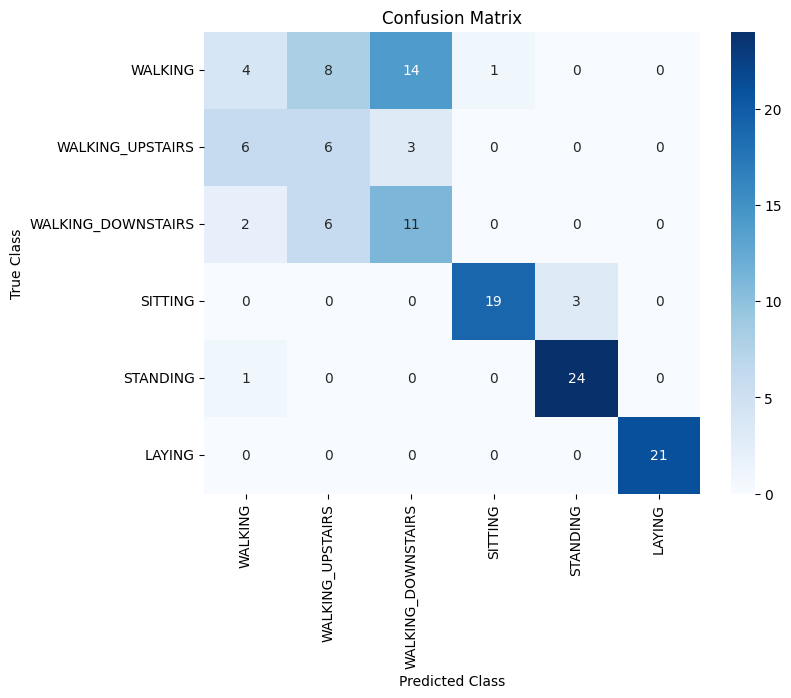

              precision    recall  f1-score   support

     Class 1       0.31      0.15      0.20        27
     Class 2       0.30      0.40      0.34        15
     Class 3       0.39      0.58      0.47        19
     Class 4       0.95      0.86      0.90        22
     Class 5       0.89      0.96      0.92        25
     Class 6       1.00      1.00      1.00        21

    accuracy                           0.66       129
   macro avg       0.64      0.66      0.64       129
weighted avg       0.65      0.66      0.65       129



In [108]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


class_names = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]


# Get predictions
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class indices

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=[f"Class {i}" for i in range(1, 7)]))


---

# CNN


In [83]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [96]:
# Segment the data into overlapping windows
def create_segments_and_labels(data, time_steps, stride):
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, stride):
        segments.append(data.iloc[i:i + time_steps][['accx', 'accy', 'accz']].values)
        labels.append(data.iloc[i + time_steps - 1]['Label'])
    return np.array(segments), np.array(labels)

time_steps = 128
stride = 64   # Overlap of 64 
X, y = create_segments_and_labels(df, time, offset)

In [97]:
# Normalize the features
scaler = StandardScaler()
n_samples, time_steps, n_features = X.shape
X = scaler.fit_transform(X.reshape(-1, n_features)).reshape(n_samples, time_steps, n_features)

# One-hot encode the labels
y = to_categorical(y-1) 

In [98]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test , X_val , y_test , y_val = train_test_split(X_test , y_test , test_size = 0.4 , random_state = 42)

In [114]:
# Build the 1D CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, n_features)),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=64, verbose=1)


Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.2252 - loss: 1.7909 - val_accuracy: 0.3101 - val_loss: 1.7253
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3717 - loss: 1.5434 - val_accuracy: 0.2946 - val_loss: 1.6748
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3557 - loss: 1.4381 - val_accuracy: 0.3256 - val_loss: 1.6286
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3859 - loss: 1.3494 - val_accuracy: 0.3876 - val_loss: 1.5566
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4345 - loss: 1.2926 - val_accuracy: 0.4264 - val_loss: 1.4767
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4400 - loss: 1.3139 - val_accuracy: 0.4341 - val_loss: 1.4027
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4344 - loss: 1.2394 - val_accuracy: 0.4651 - val_loss: 1.3466
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5175 - loss: 1.1646 - val_accuracy: 0.4884 - val_loss: 1

In [115]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7540 - loss: 0.5727
Test Loss: 0.4821
Test Accuracy: 0.7829


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


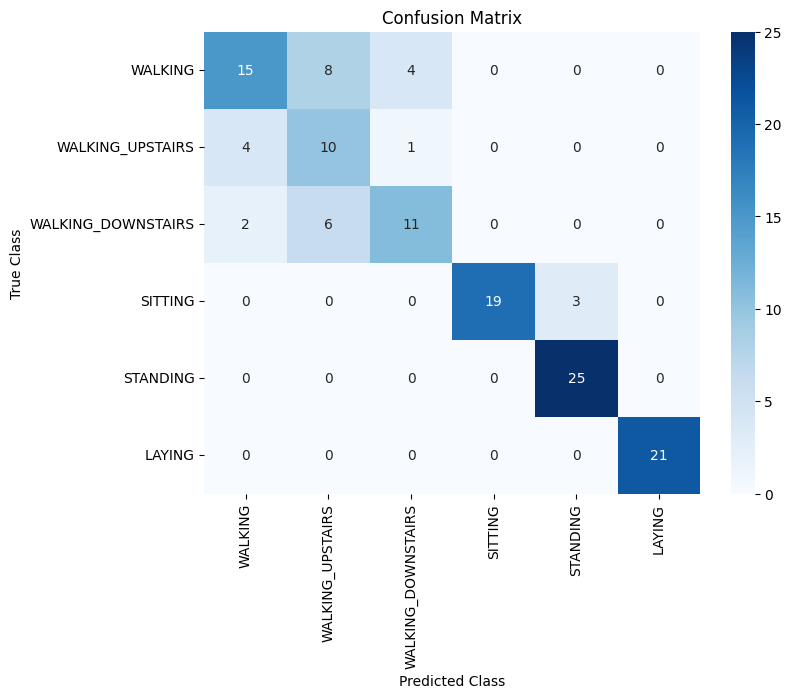

              precision    recall  f1-score   support

     Class 1       0.71      0.56      0.62        27
     Class 2       0.42      0.67      0.51        15
     Class 3       0.69      0.58      0.63        19
     Class 4       1.00      0.86      0.93        22
     Class 5       0.89      1.00      0.94        25
     Class 6       1.00      1.00      1.00        21

    accuracy                           0.78       129
   macro avg       0.79      0.78      0.77       129
weighted avg       0.81      0.78      0.79       129



In [116]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class indices

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=[f"Class {i}" for i in range(1, 7)]))


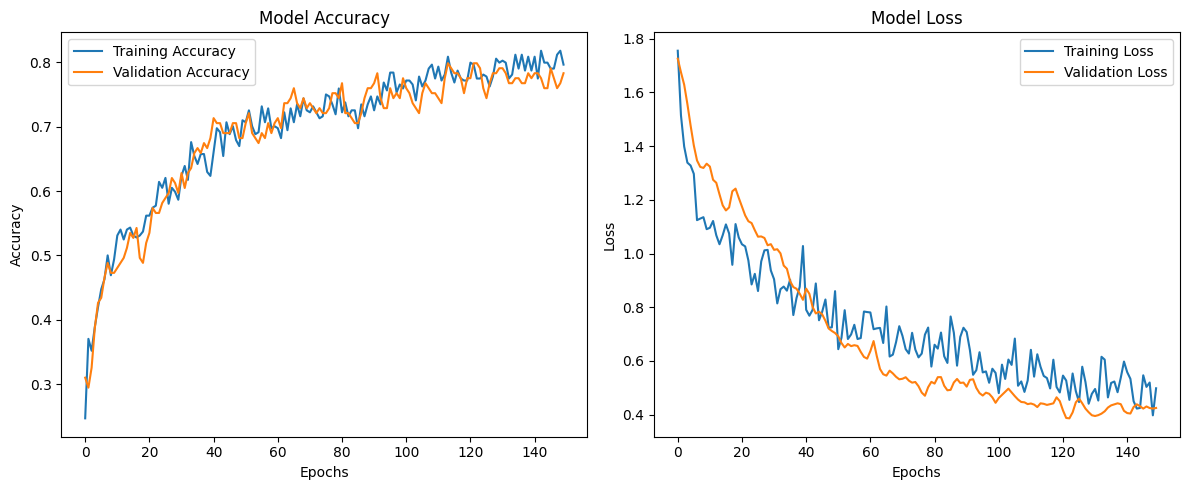

In [117]:
# Accuracy and loss plots
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


---

# CNN & LSTM

In [125]:
# Define the CNN-LSTM model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=64,
    verbose=1
)

Epoch 1/150


c:\Users\OmkarRPrabhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.1315 - loss: 1.7909 - val_accuracy: 0.1724 - val_loss: 1.7686
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2614 - loss: 1.7564 - val_accuracy: 0.2989 - val_loss: 1.7364
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3342 - loss: 1.7281 - val_accuracy: 0.2299 - val_loss: 1.6895
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3485 - loss: 1.6792 - val_accuracy: 0.2644 - val_loss: 1.6252
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3377 - loss: 1.5990 - val_accuracy: 0.2644 - val_loss: 1.5558
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3512 - loss: 1.5162 - val_accuracy: 0.2989 - val_loss: 1.4906
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3839 - loss: 1.4601 - val_accuracy: 0.2989 - val_loss: 1.4420
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3818 - loss: 1.3927 - val_accuracy: 0.3103 - val_loss: 1.3998
Epoc

Test Accuracy: 0.74
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


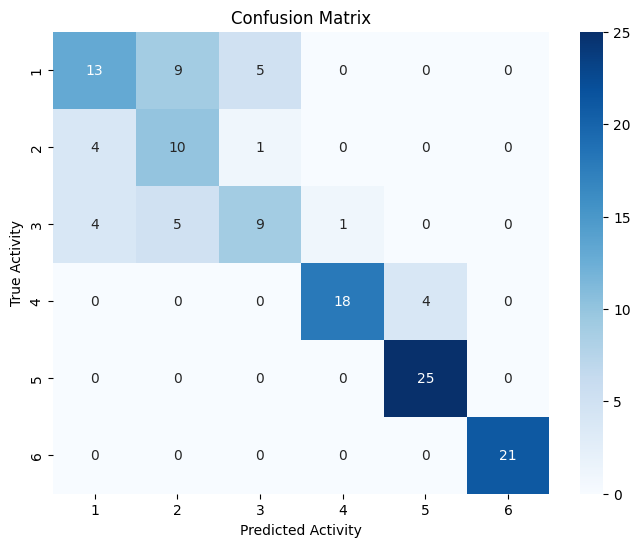

              precision    recall  f1-score   support

     Class 1       0.62      0.48      0.54        27
     Class 2       0.42      0.67      0.51        15
     Class 3       0.60      0.47      0.53        19
     Class 4       0.95      0.82      0.88        22
     Class 5       0.86      1.00      0.93        25
     Class 6       1.00      1.00      1.00        21

    accuracy                           0.74       129
   macro avg       0.74      0.74      0.73       129
weighted avg       0.76      0.74      0.74       129



In [128]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot to class indices

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes.values(), yticklabels=classes.values())
plt.xlabel("Predicted Activity")
plt.ylabel("True Activity")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=[f"Class {i}" for i in range(1, 7)]))


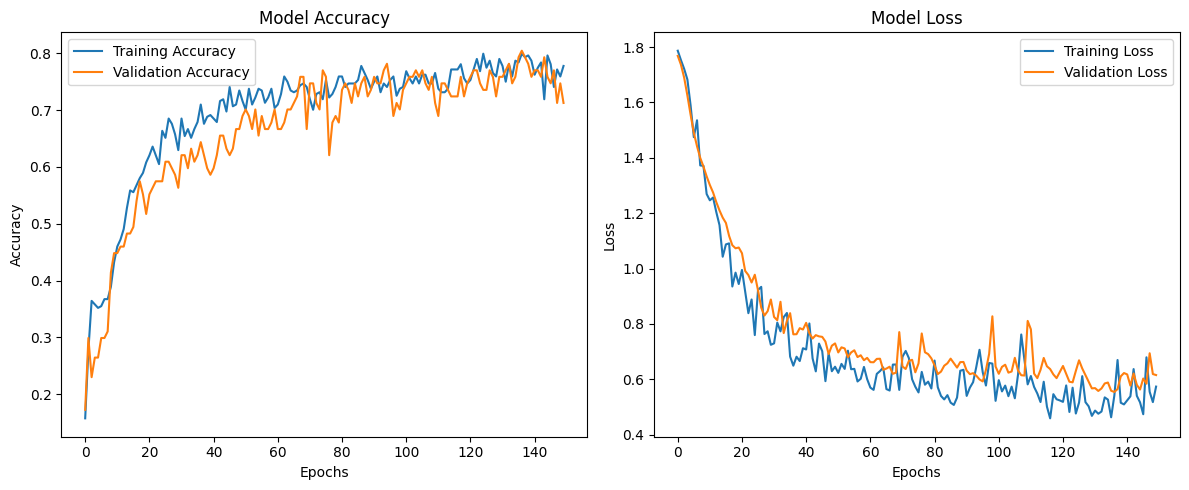

In [129]:
# Accuracy and loss plots
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()